In [1]:
import numpy as np
from network import Network
import matplotlib.pyplot as plt
import matplotlib.animation as animation



## Ejercicio 1

In [14]:
def plot(dataset, network):
    X = [x[0][0] for x in dataset]
    Y = [x[0][1] for x in dataset]
    c = [x[1][0] for x in dataset]

    plt.scatter(X, Y, c=c,  cmap="coolwarm")

    m, a, b = network.w[-1][0]  # mx + ay + b = 0

    x = np.linspace(-2, 2, 100)
    y = (-m*x - b)/a
    plt.plot(x, y)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.show()


### 1.a

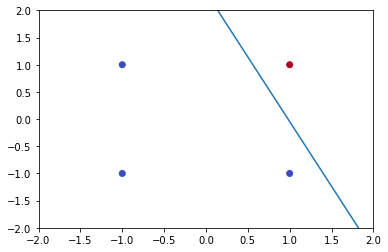

In [15]:
dataset = [
  [[-1, -1], [-1]],
  [[-1, 1], [-1]],
  [[1, -1], [-1]],
  [[1, 1], [1]]
]

network = Network(structure=([2, 1]), activation='step', seed=17)
network.train(dataset)

plt.figure("AND")
plot(dataset,network)



#### animation

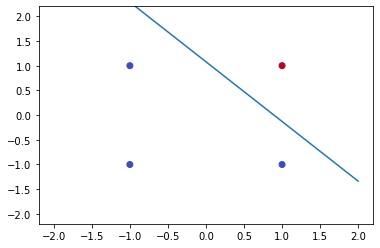

In [7]:
plt.figure("AND animation")
data = []
x = np.linspace(-2, 2, 100)
line, =plt.plot(x,x)
X = [x[0][0] for x in dataset]
Y = [x[0][1] for x in dataset]
c = [x[1][0] for x in dataset]
plt.scatter(X, Y, c=c, cmap="coolwarm")
def callback(network):
    m, a, b = network.w[-1][0]  # mx + ay + b = 0
    data.append((m,a,b))

def update(frame):
    m, a, b = data[frame]
    y = (-m*x - b)/a
    line.set_ydata(y)
    return line
network = Network(structure=([2, 1]), activation='tanh', seed=17)

network.train(dataset, epochs=100, callback=callback, learning_rate=0.01)
anim = animation.FuncAnimation(plt.gcf(), update, frames=len(data)-1, interval=60)

anim.save('ej1.a.mp4', writer='imagemagick')

anim = []

update(len(data)-1)

plt.show()





### 1.b

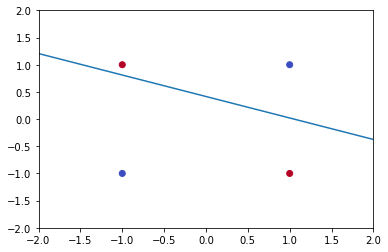

In [10]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]


network = Network(structure=([2, 1]), activation='step', seed=17)
network.train(dataset, epochs=1000)

plot(dataset,network)


## Ejercicio 3

### 3.a

In [11]:
lim = 1
size = 100
x = np.linspace(-lim, lim, size)
y = np.linspace(-lim, lim, size)
sample = [[i, j] for i in x for j in y]

def plot(network):
  img = np.zeros((size, size))
  for i in range(size):
      for j in range(size):
          img[i][j] = network.feedforward([x[i], y[j]])[0]
  
  plt.pcolormesh(x, y, img, vmin=-1, vmax=1, shading='gouraud' ,cmap="coolwarm")

Error: 9.81e-03


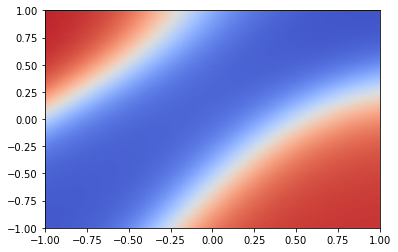

In [12]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]

network = Network(structure=(
    [2, 3, 2, 1]), activation='tanh', seed=17, args={'b': 1})
network.train(dataset, learning_rate=0.1, target_error=0.01, momentum=0.9)
print("Error: {:.2e}".format(network.error(dataset)))
plot(network)